In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/data3",
    validation_split=0.15,
    subset="both",
    seed=42,
    image_size=(200, 200),
    batch_size=32,
)

Found 2000 files belonging to 2 classes.
Using 1700 files for training.
Using 300 files for validation.


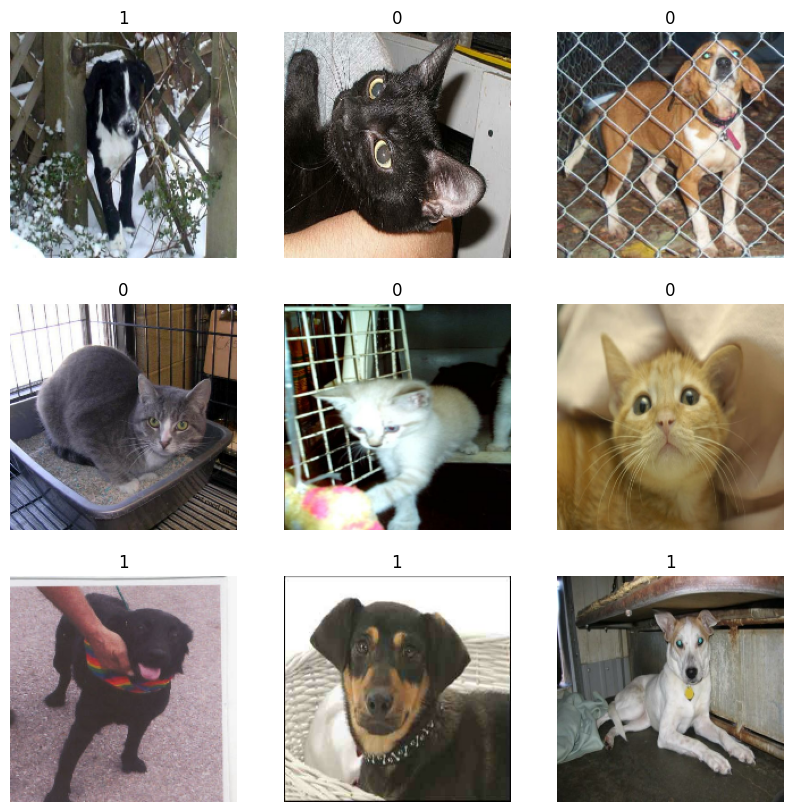

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

In [ ]:
inputs = tf.keras.Input(shape=(200, 200, 3))

x = tf.keras.layers.Rescaling(1. / 255)(inputs)

x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same")(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
54/54 [==============================] - 130s 2s/step - loss: 0.7850 - accuracy: 0.5206 - val_loss: 0.6551 - val_accuracy: 0.6300
Epoch 2/5
54/54 [==============================] - 46s 851ms/step - loss: 0.6713 - accuracy: 0.5818 - val_loss: 0.6587 - val_accuracy: 0.5833
Epoch 3/5
54/54 [==============================] - 50s 911ms/step - loss: 0.6478 - accuracy: 0.6247 - val_loss: 0.5836 - val_accuracy: 0.7067
Epoch 4/5
54/54 [==============================] - 45s 823ms/step - loss: 0.6219 - accuracy: 0.6635 - val_loss: 0.5690 - val_accuracy: 0.7200
Epoch 5/5
54/54 [==============================] - 45s 813ms/step - loss: 0.5994 - accuracy: 0.6841 - val_loss: 0.5600 - val_accuracy: 0.7067


In [ ]:
import numpy as np
from sklearn.metrics import classification_report


pred = [np.argmax(pred) for pred in model.predict(test_ds)]

y_test = np.array([])

images, labels = tuple(zip(*test_ds))
for i in labels:
    y_test = np.append(y_test, i)

print(classification_report(y_test, pred))

10/10 [==============================] - 2s 161ms/step
              precision    recall  f1-score   support

         0.0       0.64      0.82      0.72       137
         1.0       0.80      0.61      0.69       163

    accuracy                           0.71       300
   macro avg       0.72      0.72      0.71       300
weighted avg       0.73      0.71      0.70       300



In [ ]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)
vgg.summary()

574710816/574710816 [==============================] - 7s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/caltech",
    validation_split=0.15,
    subset="both",
    seed=42,
    image_size=(224, 224),
    batch_size=32,
)

Found 353 files belonging to 3 classes.
Using 301 files for training.
Using 52 files for validation.


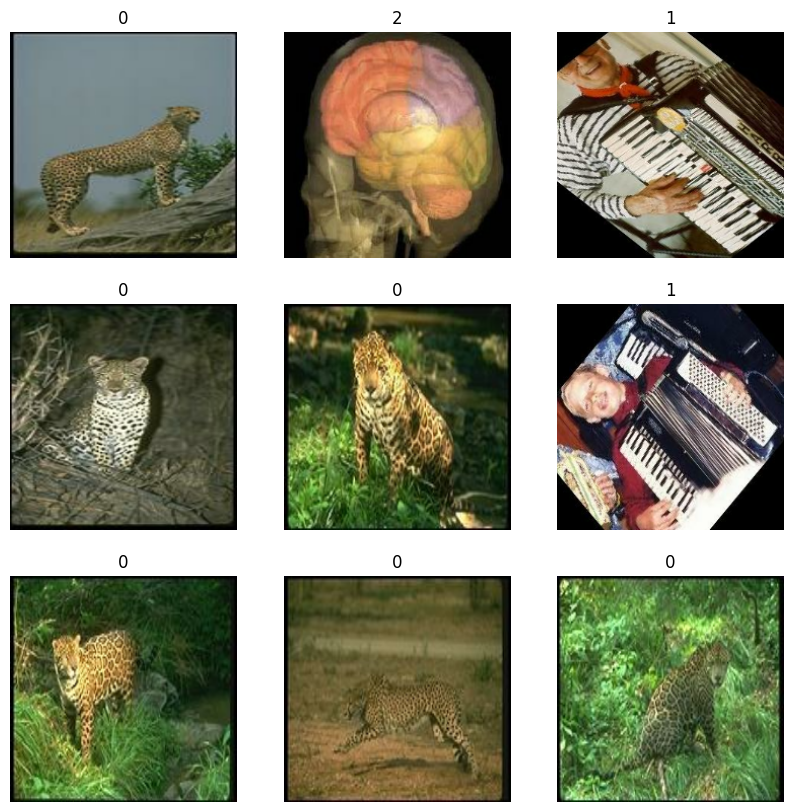

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
inp = vgg.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(vgg.layers[-2].output)
model_new = tf.keras.Model(inp, out)

In [ ]:
model_new.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
pred = [np.argmax(pred) for pred in model_new.predict(test_ds)]

y_test = np.array([])

images, labels = tuple(zip(*test_ds))
for i in labels:
    y_test = np.append(y_test, i)

print(classification_report(y_test, pred))

2/2 [==============================] - 27s 11s/step
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        30
         1.0       0.00      0.00      0.00         6
         2.0       0.62      0.81      0.70        16

    accuracy                           0.73        52
   macro avg       0.48      0.55      0.51        52
weighted avg       0.67      0.73      0.70        52



In [ ]:
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True

In [ ]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model_new.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
10/10 [==============================] - 199s 20s/step - loss: 0.1814 - accuracy: 0.9402 - val_loss: 7.9439e-04 - val_accuracy: 1.0000
Epoch 2/5
10/10 [==============================] - 197s 20s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 5.3691e-05 - val_accuracy: 1.0000
Epoch 3/5
10/10 [==============================] - 202s 20s/step - loss: 1.9580e-04 - accuracy: 1.0000 - val_loss: 2.2604e-05 - val_accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 196s 20s/step - loss: 7.1291e-05 - accuracy: 1.0000 - val_loss: 1.6101e-05 - val_accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 195s 20s/step - loss: 4.8688e-05 - accuracy: 1.0000 - val_loss: 1.4024e-05 - val_accuracy: 1.0000


In [ ]:
pred = [np.argmax(pred) for pred in model_new.predict(test_ds)]

y_test = np.array([])

images, labels = tuple(zip(*test_ds))
for i in labels:
    y_test = np.append(y_test, i)

print(classification_report(y_test, pred))

2/2 [==============================] - 28s 10s/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00         6
         2.0       1.00      1.00      1.00        16

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



In [ ]:
iv3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True)
iv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 149, 149, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_98[0][0]']              
 ormalization)                  )                                                      

In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/caltech",
    validation_split=0.15,
    subset="both",
    seed=42,
    image_size=(299, 299),
    batch_size=32,
)

Found 353 files belonging to 3 classes.
Using 301 files for training.
Using 52 files for validation.


In [ ]:
input = iv3.input
my_layer = tf.keras.layers.Dense(3, activation='softmax')
output = my_layer(iv3.layers[-2].output)
model_newest = tf.keras.Model(input, output)

In [ ]:
model_newest.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
pred = [np.argmax(pred) for pred in model_newest.predict(test_ds)]

y_test = np.array([])

images, labels = tuple(zip(*test_ds))
for i in labels:
    y_test = np.append(y_test, i)

print(classification_report(y_test, pred))

2/2 [==============================] - 11s 3s/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        30
         1.0       0.67      0.33      0.44         6
         2.0       0.31      0.94      0.46        16

    accuracy                           0.33        52
   macro avg       0.32      0.42      0.30        52
weighted avg       0.17      0.33      0.19        52



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for layer in model_newest.layers:
    layer.trainable = False
model_newest.layers[-1].trainable = True

In [ ]:
model_newest.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_newest.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
10/10 [==============================] - 63s 6s/step - loss: 6.8131 - accuracy: 0.4751 - val_loss: 4.0009 - val_accuracy: 0.5192
Epoch 2/5
10/10 [==============================] - 62s 6s/step - loss: 3.5280 - accuracy: 0.5781 - val_loss: 2.8770 - val_accuracy: 0.7115
Epoch 3/5
10/10 [==============================] - 59s 6s/step - loss: 2.1719 - accuracy: 0.7375 - val_loss: 1.6459 - val_accuracy: 0.6923
Epoch 4/5
10/10 [==============================] - 59s 6s/step - loss: 1.3300 - accuracy: 0.7741 - val_loss: 1.4923 - val_accuracy: 0.7692
Epoch 5/5
10/10 [==============================] - 59s 6s/step - loss: 0.8091 - accuracy: 0.8505 - val_loss: 0.9381 - val_accuracy: 0.7692


In [ ]:
pred = [np.argmax(pred) for pred in model_newest.predict(test_ds)]

y_test = np.array([])

images, labels = tuple(zip(*test_ds))
for i in labels:
    y_test = np.append(y_test, i)

print(classification_report(y_test, pred))

2/2 [==============================] - 13s 5s/step
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89        30
         1.0       0.50      0.50      0.50         6
         2.0       0.60      0.75      0.67        16

    accuracy                           0.77        52
   macro avg       0.69      0.69      0.69        52
weighted avg       0.80      0.77      0.78        52

